![](images/sklearn-workflow-title.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# 1. load your data
heart_disease = pd.read_csv("data/heart_disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# create x (features matrix)
x = heart_disease.drop('target', axis=1)

# create y (labels)
y = heart_disease['target']

In [4]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# view and check default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
clf.fit(x_train, y_train);

In [7]:
# make a prediction
y_label = clf.predict(x_test)
y_label

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [8]:
# 4. evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [9]:
clf.score(x_test, y_test)

0.7213114754098361

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
print(classification_report(y_test, y_label))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        31
           1       0.70      0.77      0.73        30

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [12]:
confusion_matrix(y_test, y_label)

array([[21, 10],
       [ 7, 23]])

In [13]:
accuracy_score(y_test, y_label)

0.7213114754098361

In [14]:
np.random.seed(42)

In [15]:
# 5. improve a model
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")

Trying model with 10 estimators...
Model accuracy on test set: 70.49%
Trying model with 20 estimators...
Model accuracy on test set: 75.41%
Trying model with 30 estimators...
Model accuracy on test set: 72.13%
Trying model with 40 estimators...
Model accuracy on test set: 75.41%
Trying model with 50 estimators...
Model accuracy on test set: 75.41%
Trying model with 60 estimators...
Model accuracy on test set: 72.13%
Trying model with 70 estimators...
Model accuracy on test set: 77.05%
Trying model with 80 estimators...
Model accuracy on test set: 78.69%
Trying model with 90 estimators...
Model accuracy on test set: 75.41%


In [16]:
# 6. save a model and load it
import pickle

In [17]:
pickle.dump(clf, open("models/random_forest_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("models/random_forest_model_1.pkl", "rb"))

In [19]:
loaded_model.score(x_test, y_test)

0.7540983606557377

# Convert Data to Numerical

In [20]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
len(car_sales)

1000

In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [23]:
# Split into x/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [24]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [25]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [26]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [27]:
# Build the machine learning model
from sklearn.ensemble import RandomForestRegressor

# Split on training and testing
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
model.score(x_test, y_test)

0.259996418764183

# Converting NULL Data

In [29]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [30]:
car_sales_missing.isna().sum(), car_sales_missing.dtypes

(Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64,
 Make              object
 Colour            object
 Odometer (KM)    float64
 Doors            float64
 Price            float64
 dtype: object)

In [31]:
# try convert null values to number

# fill the "Make" column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing") # replace with "missing" string

# fill the "Colour" column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing") # replace with "missing" string

# fill the "Odometer" column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing['Odometer (KM)'].mean())
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].infer_objects()

# fill the "Doors" column
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [32]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [33]:
car_sales_missing.dropna(inplace=True)

In [34]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [35]:
# create x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [36]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

# Fill Missing Data

In [37]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
# split x & y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [41]:
# fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", numerical_imputer, num_features)
])

# transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [42]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [43]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [44]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [45]:
# fit model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

### Choosing the right estimator/algorithm for your problem

* Sklearn refers to machine learning models, algorithms as estimator
* Classification problem - predicting a category (heart diease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as as classification estimator
* Regression problem - predicting a number (selling price of a car)
![](images/ml_map.png)

### Picking a machine learning model for regression problem

Use the sample dataset of Californai Housing dataset

In [46]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(n_retries=10)
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [47]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [48]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
# import algorithm
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# checkt the score of the model
model.score(x_test, y_test)

0.5758549611440126

### Using a different model to improved the model output

Sklearn ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [50]:
# import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup the random seed
np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check the score of the model
model.score(x_test, y_test)

0.8066196804802649

### Picking a machine learning model for classification problem

In [51]:
heart_disease = pd.read_csv("data/heart_disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(x_train, y_train)

# evaluate
clf.score(x_test, y_test)

0.8688524590163934

In [53]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [54]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

# evaluate
clf.score(x_test, y_test)

0.8524590163934426

### Fit the model/algorithm on our data and use it make prediction

Different names for:
* `x` = features, features variables, data
* `y` = labels, target, target variables

In [55]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)

# fit the model to the data
clf.fit(x_train, y_train)

# evaluate
clf.score(x_test, y_test)

0.8524590163934426

In [56]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [57]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Make predictions using a machine learning model

2 ways to predictions:
1. `predict()`
2. `predict_proba()`

In [58]:
# used a trained model to make predictions
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [59]:
# compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [60]:
clf.score(x_test, y_test)

0.8524590163934426

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with predict_proba()

In [62]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

`predict()` can also be used for regression models

In [63]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model instance
model = RandomForestRegressor()

# fit the model to the data
model.fit(x_train, y_train)

# make predictions
y_preds = model.predict(x_test)

In [65]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [66]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [67]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

### Evaluating a machine learning model

Three ways to evaluate sckitlearn models/estimators:
1. estimators built-in `score()` method
2. the `scoring` parameter
3. problem-speicific metric functions

Details: https://scikit-learn.org/stable/modules/model_evaluation.html

### Evaluating a model with the `score` method

In [68]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=1000)

clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [69]:
clf.score(x_train, y_train)

1.0

In [70]:
clf.score(x_test, y_test)

0.8688524590163934

Let's use the `score()` on our regression problem

In [71]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model instance
model = RandomForestRegressor(n_estimators=100)

# fit the model to the data
model.fit(x_train, y_train)

RandomForestRegressor()

In [72]:
model.score(x_test, y_test)

0.8066196804802649

### Evaluating a model using the `scoring` parameter

In [73]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
clf.score(x_test, y_test)

0.8524590163934426

In [75]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [76]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test, y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [77]:
# scoring parameter set to None by default
cross_val_score(clf, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification model evaluation metrics
1. accuracy
2. area under ROC curve
3. confusion matrix
4. classification report

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y)

In [79]:
np.mean(cross_val_score)

0.8248087431693989

### Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False postive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model preicts 0 when truth is 1

Resources
* https://www.youtube.com/watch?v=4jRBRDbJemM
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
* https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [80]:
from sklearn.metrics import roc_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the classifier
clf.fit(x_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [81]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [82]:
# calculate fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

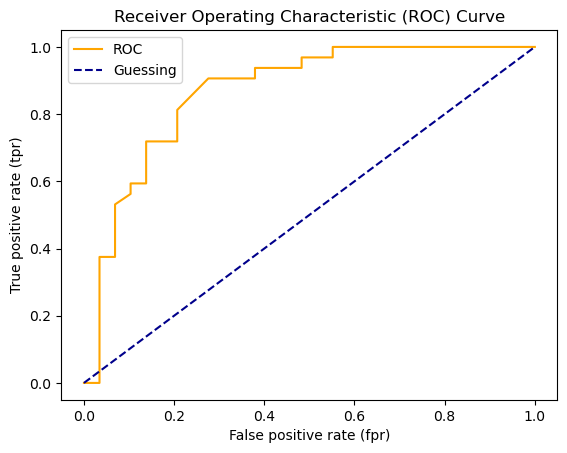

In [83]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

### for latest version of sklearn
# from sklearn.metrics import RocCurveDisplay
# RocCurveDisplay.from_estimator(clf, X_test, y_test)

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve give the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predective power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

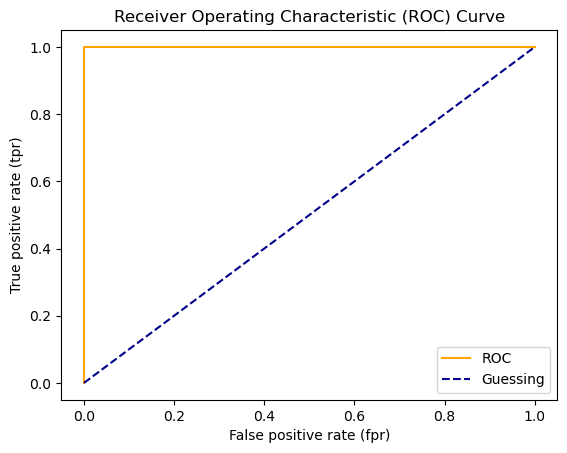

In [85]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [86]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [87]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [88]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


<Axes: >

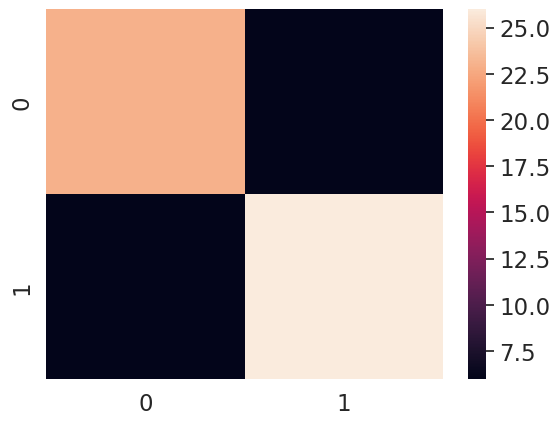

In [89]:
# make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# ploat it using seaborn
sns.heatmap(conf_mat)

In [90]:
# see here for confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [91]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Labels,,
0,23,6
1,6,26


### Creating a confusion matrix using sklearn
To use the new methods of creating a confusion matrix with sklearn you will need sklearn version 1.0+

In [92]:
import sklearn
sklearn.__version__

'1.6.1'

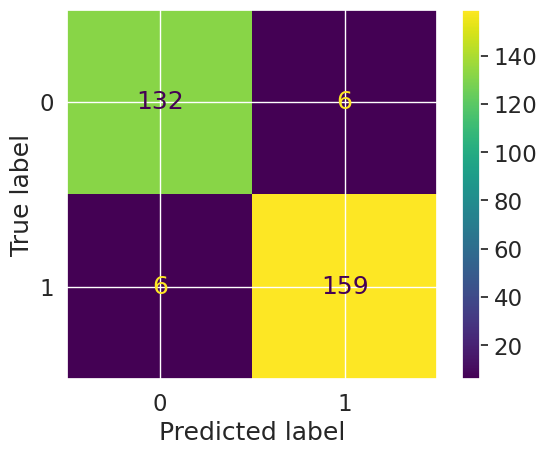

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

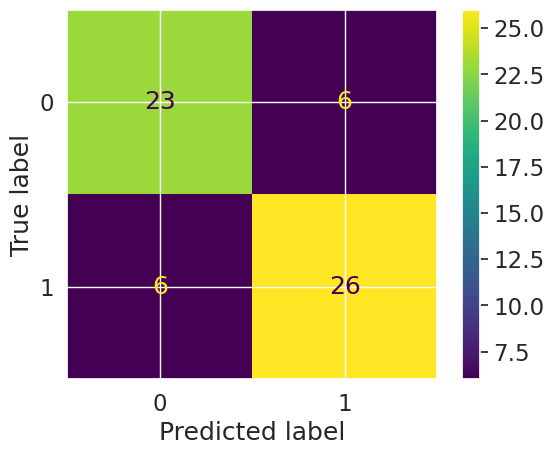

In [94]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

### Classification Report

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [96]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/xcql/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression model evaluation metrics

Model evaluation metrics documentation
- https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

#### R^2
What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly a range of numbers it's R^2 value would be 1.
- https://www.scribbr.com/statistics/coefficient-of-determination

#### Other Resources
- https://towardsdatascience.com/beyond-accuracy-other-classification-metrics-you-should-know-in-machine-learning-ea671be83bb7

In [97]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [98]:
model.score(x_test, y_test)

0.8066196804802649

In [99]:
y_test.mean()

2.0550030959302323

In [100]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [101]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [102]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [103]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [104]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [105]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [106]:
np.abs(df["differences"]).mean()

0.3265721842781009

**Mean Squared Error (MSE)**

MSE is the mean of the square of the erros between actual and predicted values.

In [107]:
# mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [108]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [109]:
# calculate MSE manually
squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

### Using `scoring` parameter

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [111]:
np.random.seed(42)

# cross-validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None) # using None as scoring default, it uses default of accuracy
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [112]:
print(f"The cross-validation accuracy is: {np.mean(cv_acc) * 100:.2f}")

The cross-validation accuracy is: 82.48


In [113]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [114]:
print(f"The cross-validation accuracy is: {np.mean(cv_acc) * 100:.2f}")

The cross-validation accuracy is: 82.48


In [115]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [116]:
print(f"The cross-validation precision is: {np.mean(cv_precision) * 100:.2f}")

The cross-validation precision is: 83.30


In [117]:
# Recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [118]:
print(f"The cross-validation recall is: {np.mean(cv_recall) * 100:.2f}")

The cross-validation recall is: 84.24


Let's see the `scoring` parameter being using for a regression problem

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [120]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [121]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [122]:
# mean squared error
cv_mse = cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46281833778669723

In [123]:
cv_mse

array([-0.51821856, -0.3315067 , -0.53872975])

In [124]:
# mean absolute error
cv_mae = cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820332646560079

In [125]:
cv_mae

array([-0.51737186, -0.4219676 , -0.50676033])

### Using different evaulation metrics as Scikitlearn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/api/sklearn.metrics.html

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model
clf = RandomForestClassifier()

# fit data
clf.fit(x_train, y_train)

# make prediction
y_preds = clf.predict(x_test)

# evaluate model using evaluation function
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:0.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [127]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create model
model = RandomForestRegressor()

# fit data
model.fit(x_train, y_train)

# make predictions
y_preds = model.predict(x_test)

# evaluate model using evaluation function
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


### Improving a Model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improved our data?

From a model prespective:
* Is there  a better model we could use?
* Could we improved the current model?

Hyperparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [128]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [129]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning hyperparameter by hand

Let's make 3 sets, training, validation and test

In [130]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [131]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2), "precision": round(precision, 2), "recall": round(recall, 2), "f1": round(f1, 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precesion: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [132]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split the data into train, validation & test tests
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

len(x_train), len(x_valid), len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# make prediction
y_preds = clf.predict(x_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precesion: 0.81
Recall: 0.88
F1 score: 0.85


In [133]:
np.random.seed(42)

# create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# make predictions
y_preds_2 = clf_2.predict(x_valid)

# evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precesion: 0.84
Recall: 0.84
F1 score: 0.84


### Hyperparameter tuning with RandomizedSearchCV

In [134]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200], 
        "max_depth": [None, 5, 10, 20, 30], 
        "max_features": ["log2", "sqrt"], 
        "min_samples_split": [2, 4, 6], 
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate randomforestclassifier
clf = RandomForestClassifier(n_jobs=1)

# setup randomizedsearchcv
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=50, cv=5, verbose=2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [135]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 5}

In [136]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precesion: 0.76
Recall: 0.89
F1 score: 0.82


### Hyperparameter tuning with GridSearchCV

In [137]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [138]:
grid_2 = {"n_estimators": [100, 200, 500], 
        "max_depth": [None], 
        "max_features": ["log2", "sqrt"], 
        "min_samples_split": [6], 
        "min_samples_leaf": [1, 2]}

In [139]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
 
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate randomforestclassifier
clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid_2, 
                      cv=5, 
                      verbose=2)

# fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [140]:
gs_y_preds = gs_clf.predict(x_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precesion: 0.74
Recall: 0.82
F1 score: 0.78


### Let's compare our different models metrics

<Axes: >

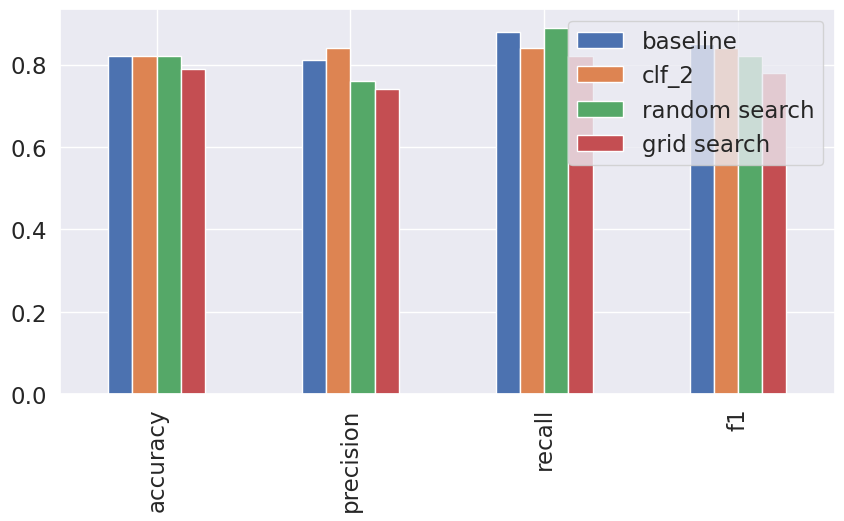

In [141]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, 
                                "clf_2": clf_2_metrics, 
                                "random search": rs_metrics, 
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 5))

### Saving and loading trained machine learning models

Two ways to save and load machine learning mdoels:
1. With Python's `pickle` module
2. With the `joblib` module

### Using `pickle`

In [142]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("models/gs_random_random_forest_model_1.pkl", "wb"))

In [143]:
# load the save model
loaded_pick_model = pickle.load(open("models/gs_random_random_forest_model_1.pkl", "rb"))

In [144]:
# test and make predictions using the loaded saved model
picked_y_preds = loaded_pick_model.predict(x_test)
evaluate_preds(y_test, picked_y_preds)

Acc: 78.69%
Precesion: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# Using Joblib

In [145]:
from joblib import dump, load

# save model to a file
dump(gs_clf, filename="models/gs_random_random_forest_model_1.joblib")

['models/gs_random_random_forest_model_1.joblib']

In [146]:
# import a saved joblib model
loaded_job_model = load(filename="models/gs_random_random_forest_model_1.joblib")

In [147]:
# test and make a predictions using the joblib model loaded
joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precesion: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Putting it all together

In [148]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head(), data.dtypes

(     Make Colour  Odometer (KM)  Doors    Price
 0   Honda  White        35431.0    4.0  15323.0
 1     BMW   Blue       192714.0    5.0  19943.0
 2   Honda  White        84714.0    4.0  28343.0
 3  Toyota  White       154365.0    4.0  13434.0
 4  Nissan   Blue       181577.0    3.0  14043.0,
 Make              object
 Colour            object
 Odometer (KM)    float64
 Doors            float64
 Price            float64
 dtype: object)

In [149]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [150]:
# getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

# import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# setup preprocessing steps (fill missing value, the convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)
    ]
)

# creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# split the data
x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

### It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [151]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ['log2', 'sqrt'],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['log2', 'sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [152]:
gs_model.score(x_test, y_test)

0.28553567798887214